In [1]:
import numpy as np

In [2]:
import snsims
import healpy as hp

In [3]:
from astropy.cosmology import Planck15 as cosmo

In [7]:
help(snsims.PowerLawRates)

Help on class PowerLawRates in module snsims.paramDistribution:

class PowerLawRates(snsims.populationParamSamples.RateDistributions)
 |  This class is a concrete implementation of `RateDistributions` with the
 |  following properties:
 |  - The SN rate : The SN rate is a single power law with numerical
 |      coefficients (alpha, beta)  passed into the instantiation. The rate is
 |      the number of SN at redshift z per comoving volume per unit observer
 |      time over the entire sky expressed in units of numbers/Mpc^3/year 
 |  - A binning in redshift is used to perform the calculation of numbers of SN.
 |      This is assumed
 |  - The expected number of SN in each of these redshift bins is computed using
 |      the rate above, and a cosmology to compute the comoving volume for the
 |      redshift bin
 |  - The numbers of SN are determined by a Poisson Distribution about the
 |      expected number in each redshift bin,  determined with a random state
 |      passed in as an a

In [31]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=9.6,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.010001, 1.1, 0.1))

In [32]:
# ten years
zdist.DeltaT

10.0

In [33]:
# The sky is >~ 40000 sq degrees ~ 4000 * LSST field of view
zdist.skyFraction * 2000 * 2

0.93084226773030898

In [34]:
zdist.zbinEdges

array([ 0.010001,  0.110001,  0.210001,  0.310001,  0.410001,  0.510001,
        0.610001,  0.710001,  0.810001,  0.910001,  1.010001])

In [36]:
zdist.zSampleSize().sum()

11989.600801547122

In [37]:
zdist.zbinEdges

array([ 0.010001,  0.110001,  0.210001,  0.310001,  0.410001,  0.510001,
        0.610001,  0.710001,  0.810001,  0.910001,  1.010001])

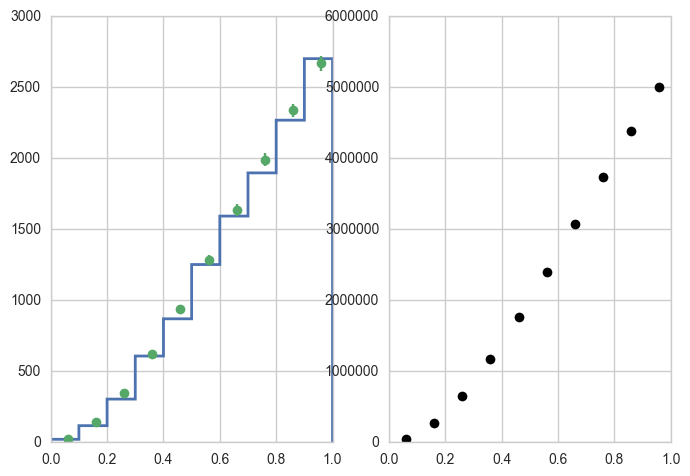

In [47]:
fig, ax = plt.subplots(1, 2)
_ = ax[0].hist(zdist.zSamples, bins=np.arange(0., 1.1, 0.1), histtype='step', lw=2)
_ = ax[0].errorbar(0.5*(zdist.zbinEdges[:-1]+zdist.zbinEdges[1:]), zdist.zSampleSize(),
                   yerr=np.sqrt(zdist.zSampleSize()), fmt='o')
_ = ax[1].plot(0.5*(zdist.zbinEdges[:-1]+zdist.zbinEdges[1:]), 
               18000*zdist.zSampleSize()/ zdist.fieldArea, 'ko')

On the left subplot, the histogram shows the samples of redshift actually simulated as a function of z. The green points are the number of samples that were expected from the rate, time, and area. The error bars show the square root of the number. 

On the right subplot, we show the numbers expected in 18000 degrees of a sky from this redshift distribution 